# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Instalación de dependencias

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


Paso 2: Descargar HTML

In [2]:
url = 'https://juegosdelamesaredonda.com/'
response = requests.get(url)
response.status_code


200

In [3]:
response.content

b' \n\n<!doctype html>\n<html lang="es-ES"  class="default" >\n\n  <head>\n    \n      \n  <meta charset="utf-8">\n\n\n  <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n\n\n  <title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importaci\xc3\xb3n y juegos para ni\xc3\xb1os</title>\n  \n      \n    <script id=\'lgcookieslaw_script_gtm\'>\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){\n            dataLayer.push(arguments);\n        }\n\n        gtag(\'consent\', \'default\', {\n            \'ad_storage\': \'denied\',\n            \'ad_user_data\': \'denied\',\n            \'ad_personalization\': \'denied\',\n            \'analytics_storage\': \'denied\',\n            \'personalization_storage\': \'granted\',\n            \'security_storage\': \'granted\'\n        });\n    </script>\n\n  \n    <script id=\'lgcookieslaw_script_ms\'>\n        window.uetq = window.uetq || [];\n\n        window.uetq.push(\'consent\', \'default\', {

Paso 3: Transforma el HTML

In [4]:
soup = BeautifulSoup(response.content)
soup


<!DOCTYPE html>
<html class="default" lang="es-ES">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importación y juegos para niños</title>
<script id="lgcookieslaw_script_gtm">
        window.dataLayer = window.dataLayer || [];
        function gtag(){
            dataLayer.push(arguments);
        }

        gtag('consent', 'default', {
            'ad_storage': 'denied',
            'ad_user_data': 'denied',
            'ad_personalization': 'denied',
            'analytics_storage': 'denied',
            'personalization_storage': 'granted',
            'security_storage': 'granted'
        });
    </script>
<script id="lgcookieslaw_script_ms">
        window.uetq = window.uetq || [];

        window.uetq.push('consent', 'default', {
            'ad_storage': 'denied',
        });
    </script>
<meta content="Juegos de la Mesa Redonda. Tienda on-line especializada donde c

In [5]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 


(41,
 <div class="product-meta">
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <h3 class="h3 product-title"><a href="https://juegosdelamesaredonda.com/18193-limit-castellano-3760269593534.html">Limit (castellano)</a></h3>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="product-price-and-shipping">
 <span aria-label="Precio regular" class="regular-price">49,95 €</span>
 <span class="discount-percentage discount-product">-10%</span>
 <span aria-label="Precio" class="price">
                           44,96 €
               </span>
 </div>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="leo-list-product-reviews">
 <div class="leo-list-product-reviews-wraper">
 <div class="star_content clearfix">
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 </div>
 </div>
 </div>
 <div class="product-desc

In [6]:
price_tag = soup.find_all('span', class_='price')
price_tag[0]

<span aria-label="Precio" class="price">
                          44,96 €
              </span>

In [7]:
productsp = soup.find_all('div', class_= 'product-price-and-shipping')
productsp[0]


<div class="product-price-and-shipping">
<span aria-label="Precio regular" class="regular-price">49,95 €</span>
<span class="discount-percentage discount-product">-10%</span>
<span aria-label="Precio" class="price">
                          44,96 €
              </span>
</div>

Paso 4: Procesa el DataFrame

In [8]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 
list_products = []
for product in products:
    product_name = product.find_all('h3', class_='h3 product-title')
    price = product.find_all('span', class_='price')
    price_line = price[0].text
    price_clean =  re.findall(r'\d+[.,]?\d*', price_line)
    
    list_products.append({'name': product_name[0].text,
                          'price': price_clean[0]})
list_products 

[{'name': 'Limit (castellano)', 'price': '44,96'},
 {'name': 'Galileo Galilei (castellano)', 'price': '42,46'},
 {'name': 'Tambores de Guerra - Conquista + PROMO', 'price': '22,46'},
 {'name': 'Altered: Susurros del Laberinto - Caja de Sobres (castellano)',
  'price': '129,56'},
 {'name': 'The Mandalorian: Adventures - Un Clan de Dos (castellano)',
  'price': '35,96'},
 {'name': 'Islebound: Emerald Edition', 'price': '45,86'},
 {'name': 'Ziggurat', 'price': '33,26'},
 {'name': 'Kingdom Legacy: Reino Feudal - Ambiciones', 'price': '7,16'},
 {'name': 'Criaturas de las Sombras: Roca Fundida', 'price': '17,96'},
 {'name': 'Maldita Mazmorra', 'price': '24,26'},
 {'name': 'Pequeños Grandes Reinos', 'price': '23,96'},
 {'name': 'Star Wars: Imperial Assault', 'price': '98,96'},
 {'name': 'Cthulhu: Death May Die (castellano)', 'price': '98,96'},
 {'name': 'La llamada de Cthulhu: Caja de inicio - Edicion Revisada',
  'price': '35,63'},
 {'name': 'Set a Watch: Edicion Deluxe (castellano)', 'price

In [9]:
df = pd.DataFrame(list_products)
df

,name,price
0,Limit (castellano),"44,96"
1,Galileo Galilei (castellano),"42,46"
2,Tambores de Guerra - Conquista + PROMO,"22,46"
3,Altered: Susurros del Laberinto - Caja de Sobr...,"129,56"
4,The Mandalorian: Adventures - Un Clan de Dos (...,"35,96"
5,Islebound: Emerald Edition,"45,86"
6,Ziggurat,"33,26"
7,Kingdom Legacy: Reino Feudal - Ambiciones,"7,16"
8,Criaturas de las Sombras: Roca Fundida,"17,96"
9,Maldita Mazmorra,"24,26"


Paso 5: Almacena los datos en sqlite

In [10]:
df['price_float'] = df['price'].str.replace(',', '.')
df

,name,price,price_float
0,Limit (castellano),"44,96",44.96
1,Galileo Galilei (castellano),"42,46",42.46
2,Tambores de Guerra - Conquista + PROMO,"22,46",22.46
3,Altered: Susurros del Laberinto - Caja de Sobr...,"129,56",129.56
4,The Mandalorian: Adventures - Un Clan de Dos (...,"35,96",35.96
5,Islebound: Emerald Edition,"45,86",45.86
6,Ziggurat,"33,26",33.26
7,Kingdom Legacy: Reino Feudal - Ambiciones,"7,16",7.16
8,Criaturas de las Sombras: Roca Fundida,"17,96",17.96
9,Maldita Mazmorra,"24,26",24.26


Paso 6: Visualiza los datos

In [19]:
def wrap_labels_while(text, width=3):
    words = text.split(' ')
    wrapped_lines = []
    i = 0
    while i < len(words):
        palabra = words[i : i + width]
        wrapped_lines.append(' '.join(palabra))
        i += width 
    return '\n'.join(wrapped_lines)
df['wrapped_lines'] = df['name'].apply(wrap_labels_while)
df['wrapped_lines']

0                                    Limit (castellano)
1                          Galileo Galilei (castellano)
2              Tambores de Guerra\n- Conquista +\nPROMO
3     Altered: Susurros del\nLaberinto - Caja\nde So...
4     The Mandalorian: Adventures\n- Un Clan\nde Dos...
5                            Islebound: Emerald Edition
6                                              Ziggurat
7            Kingdom Legacy: Reino\nFeudal - Ambiciones
8               Criaturas de las\nSombras: Roca Fundida
9                                      Maldita Mazmorra
10                              Pequeños Grandes Reinos
11                         Star Wars: Imperial\nAssault
12                 Cthulhu: Death May\nDie (castellano)
13    La llamada de\nCthulhu: Caja de\ninicio - Edic...
14            Set a Watch:\nEdicion Deluxe (castellano)
15    Star Wars El\nBorde Exterior: Asuntos\nPendientes
16      Dead by Daylight:\nthe board game\n(castellano)
17    Mythwind: Mini Expansion\nWinds of Magic\n

/tmp/ipykernel_831/3536824386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['price_float'],


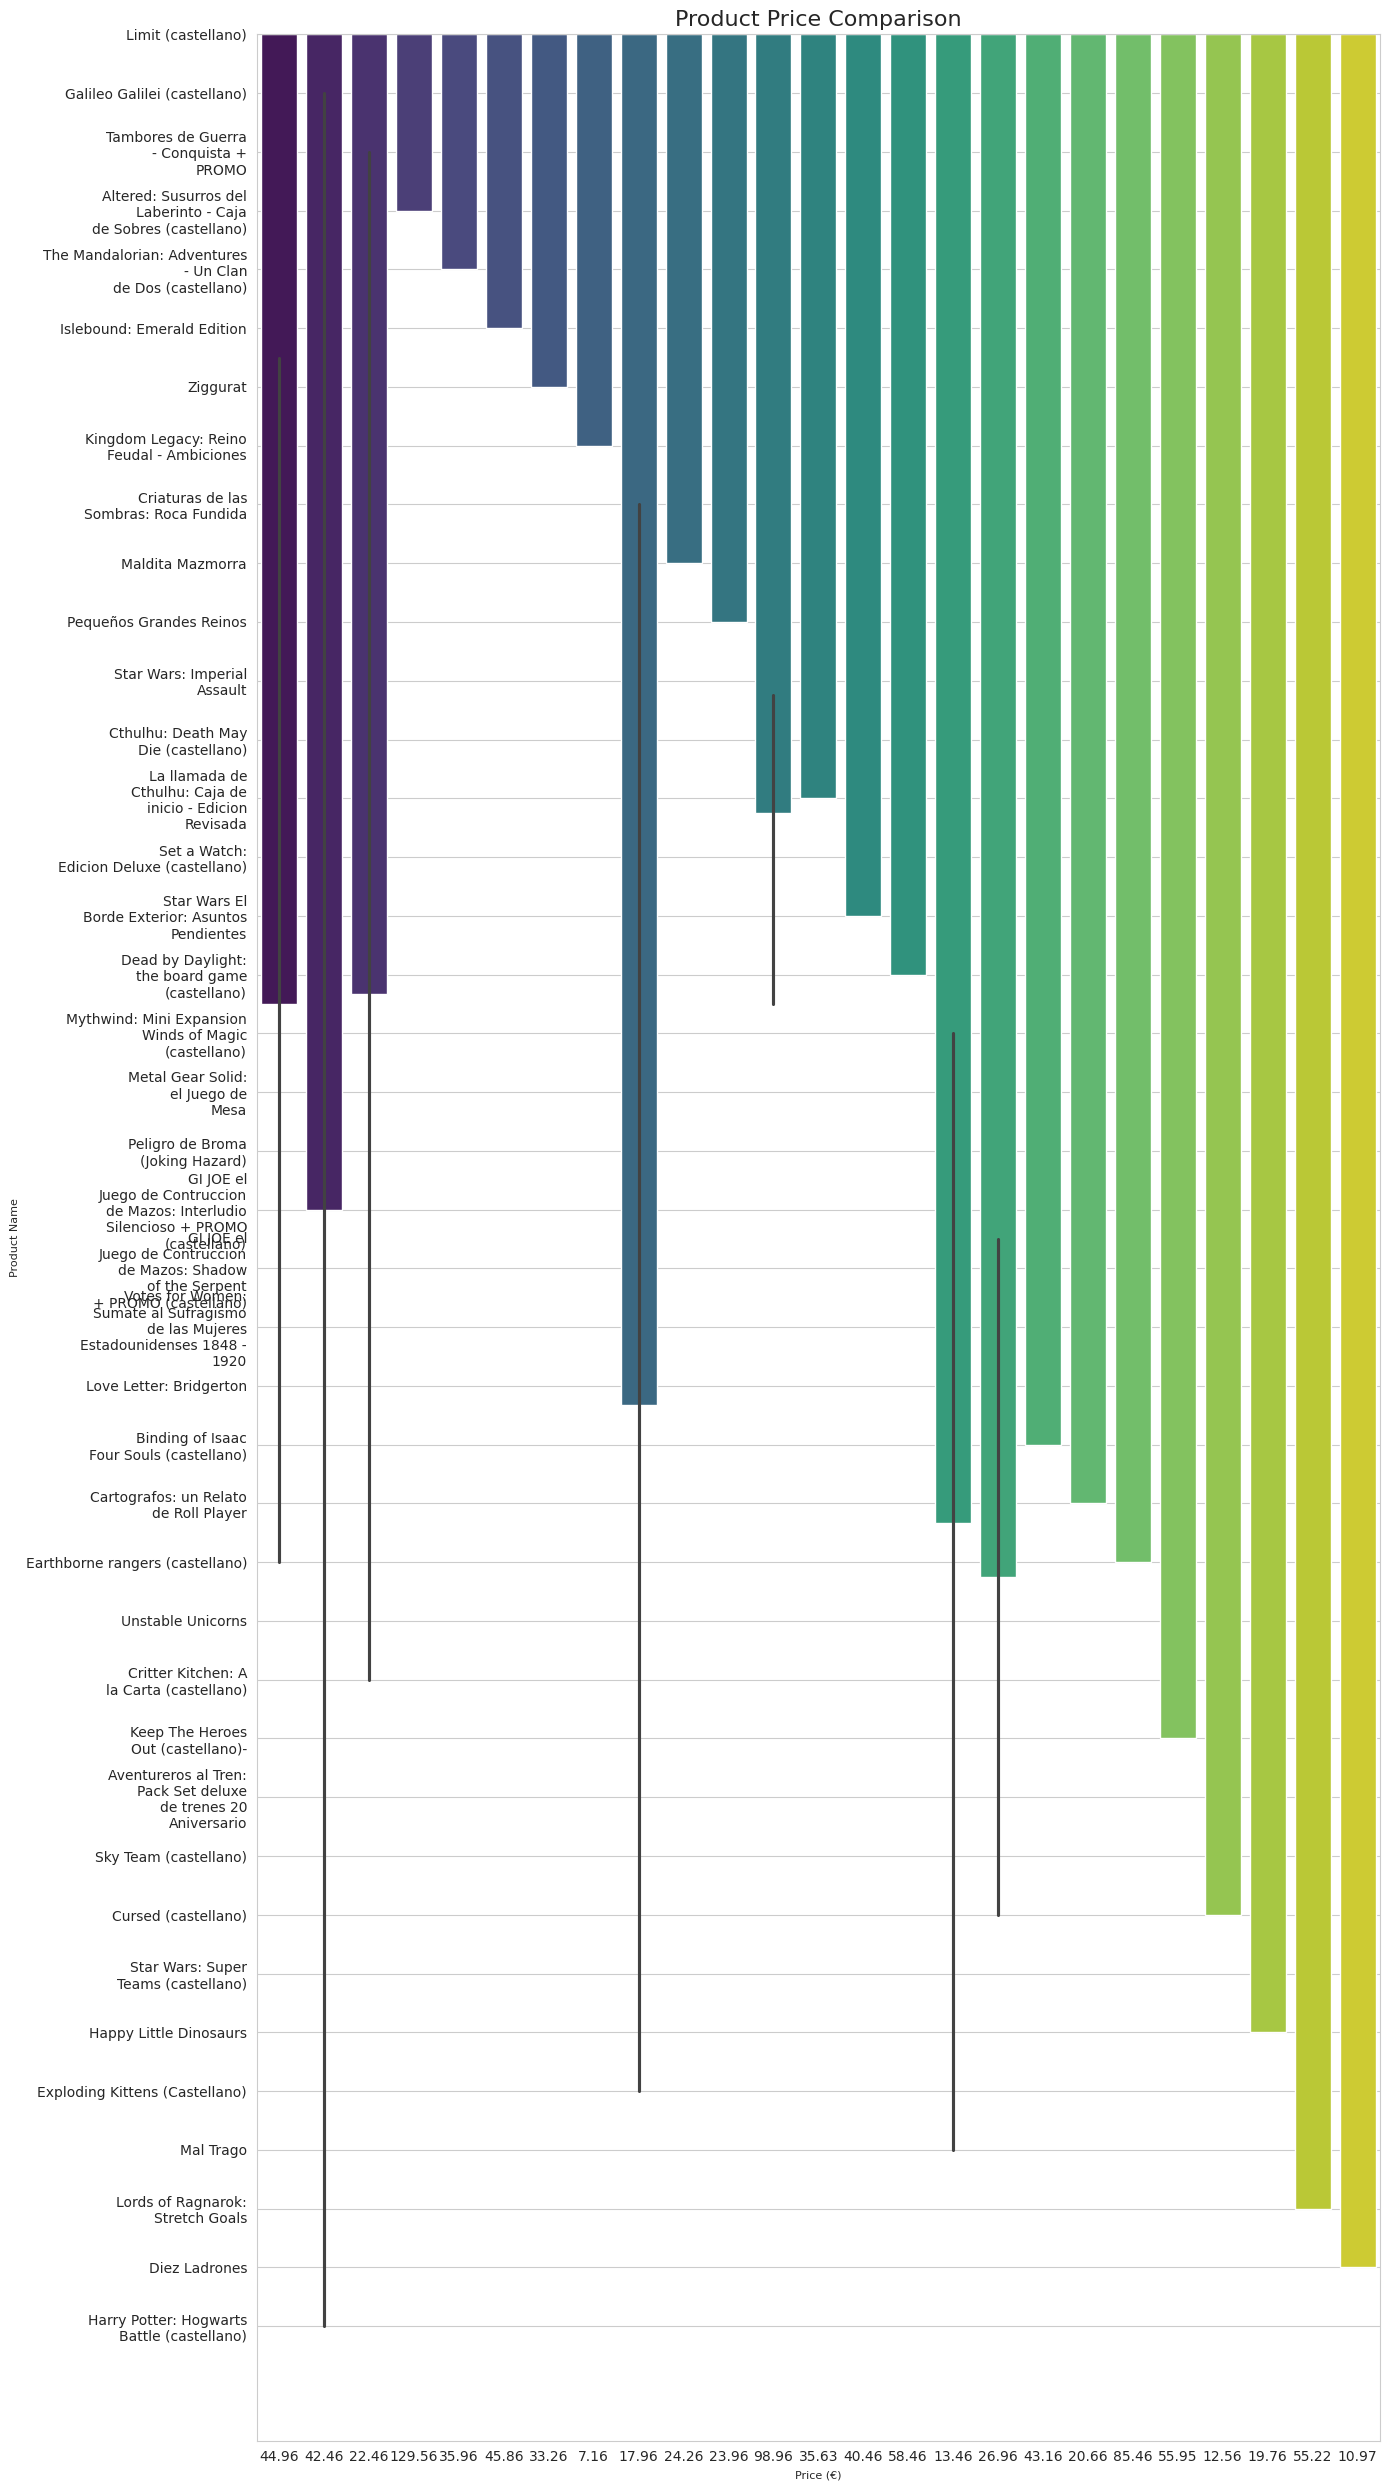

In [22]:

plt.figure(figsize=(14, 25))
sns.barplot(x= df['price_float'],
            y=df['wrapped_lines'],
            data=df.sort_values(by='price_float'),
            palette="viridis")


plt.title('Product Price Comparison', fontsize=16)
plt.xlabel('Price (€)', fontsize=8)
plt.ylabel('Product Name', fontsize=8)
plt.tight_layout() 
plt.show()